<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

# Data Gathering

In [151]:
df = pd.read_csv("car_dataset.csv")

# Data Preparation

In [152]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [154]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [155]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [156]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
Royal Enfield Classic 350     7
amaze                         7
sx4                           6
eon                           6
ertiga                        6
alto k10                      5
swift                         5
i10                           5
Royal Enfield Thunder 350     4
dzire                         4
etios liva                    4
wagon r                       4
ritz                          4
Bajaj Pulsar 150              4
Bajaj Pulsar NS 200           3
TVS Apache RTR 160            3
etios cross                   3
etios g                       3
Yamaha FZ S V 2.0             3
creta                         3
Royal Enfield Thunder 500     3
xcent   

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [157]:
df.shape

(301, 9)

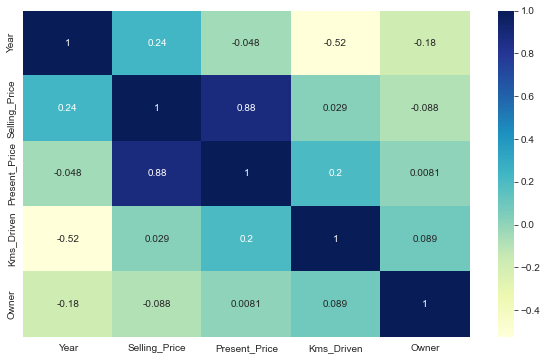

In [158]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

In [159]:
df_final = pd.get_dummies(df, drop_first=True)

In [160]:
df_final.shape

(301, 106)

In [161]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,Car_Name_Royal Enfield Bullet 350,Car_Name_Royal Enfield Classic 350,Car_Name_Royal Enfield Classic 500,Car_Name_Royal Enfield Thunder 350,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.350,5.590,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2013,4.750,9.540,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2017,7.250,9.850,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2011,2.850,4.150,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,2014,4.600,6.870,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [162]:
X = df_final.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
scaler = MinMaxScaler()

In [167]:
scaler.fit(X_train)

MinMaxScaler()

In [168]:
X_train_scaled = scaler.transform(X_train)

In [169]:
X_test_scaled = scaler.transform(X_test)

##  Model Building (Linear Regression)

In [170]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [171]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [172]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

# Interpret the model

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [174]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.950,-349501931341381235638272.000
mae,0.684,368796479103.222
mse,1.488,3358300544901102832713728.000
rmse,1.220,1832566654968.136


# Model Evaluation

In [177]:
from sklearn.model_selection import cross_validate, cross_val_score

In [178]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [179]:
scores

{'fit_time': array([0.01115108, 0.00559211, 0.00647712, 0.00552225, 0.01161194]),
 'score_time': array([0.00429296, 0.00179911, 0.00244904, 0.00232196, 0.00202608]),
 'test_r2': array([-6.26400432e+26, -8.04508583e+24, -3.19020816e+26, -2.93831172e+24,
        -3.35067663e+25]),
 'test_neg_mean_absolute_error': array([-2.89805067e+13, -4.67745298e+12, -2.39664656e+13, -5.58473833e+12,
        -1.13692387e+13]),
 'test_neg_mean_squared_error': array([-5.64553761e+27, -4.16235779e+26, -5.86834868e+27, -1.09126069e+26,
        -8.81868067e+26]),
 'test_neg_root_mean_squared_error': array([-7.51367927e+13, -2.04018572e+13, -7.66051479e+13, -1.04463424e+13,
        -2.96962635e+13])}

In [180]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.011,0.004,-626400431608289731165552640.000,-28980506720004.660,-5645537610253678171593375744.000,-75136792653490.859
2,0.006,0.002,-8045085829322182322290688.000,-4677452981795.876,-416235778737327052863569920.000,-20401857237450.887
3,0.006,0.002,-319020815705055221711372288.000,-23966465647193.793,-5868348678072837498352959488.000,-76605147856216.797
4,0.006,0.002,-2938311721842650474610688.000,-5584738330950.422,-109126069096672853734981632.000,-10446342378874.668
5,0.012,0.002,-33506766322053365368881152.000,-11369238704846.961,-881868067301134164241154048.000,-29696263524240.457


In [181]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             -197982282237312614317162496.000
test_neg_mean_absolute_error                     -14915680476958.344
test_neg_mean_squared_error        -2584223240692330195547324416.000
test_neg_root_mean_squared_error                 -42457280730054.734
dtype: float64

In [182]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.950,-349501931341381235638272.000
mae,0.684,368796479103.222
mse,1.488,3358300544901102832713728.000
rmse,1.220,1832566654968.136


In [183]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"], index=X.columns)
lm_df

,lm_coef
Year,10.048
Present_Price,52.813
Kms_Driven,-1.646
Owner,1.196
Car_Name_Activa 3g,-5.178
Car_Name_Activa 4g,-9.248
Car_Name_Bajaj ct 100,-7.390
Car_Name_Bajaj Avenger 150,-7.856
Car_Name_Bajaj Avenger 150 street,-7.962
Car_Name_Bajaj Avenger 220,-8.365


# Regularization

# Ridge

In [184]:
from sklearn.linear_model import Ridge, RidgeCV

In [185]:
ridge_model = Ridge(alpha=1, random_state=101)

In [186]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=101)

In [187]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [188]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.904,0.708
mae,1.028,1.301
mse,2.868,2.809
rmse,1.694,1.676


In [189]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.950,-349501931341381235638272.000,0.904,0.708
mae,0.684,368796479103.222,1.028,1.301
mse,1.488,3358300544901102832713728.000,2.868,2.809
rmse,1.220,1832566654968.136,1.694,1.676


In [190]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [191]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [192]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [193]:
ridge_cv_model.alpha_

0.15000000000000002

In [194]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [195]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.935,0.687
mae,0.810,1.264
mse,1.921,3.004
rmse,1.386,1.733


In [196]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.950,-349501931341381235638272.000,0.904,0.708,0.935,0.687
mae,0.684,368796479103.222,1.028,1.301,0.810,1.264
mse,1.488,3358300544901102832713728.000,2.868,2.809,1.921,3.004
rmse,1.220,1832566654968.136,1.694,1.676,1.386,1.733


In [197]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.23"], index=X.columns)

In [198]:
pd.concat([lm_df, rcm_df], axis = 1)

,lm_coef,ridge_cv_coef_0.23
Year,10.048,9.615
Present_Price,52.813,24.328
Kms_Driven,-1.646,-1.158
Owner,1.196,1.070
Car_Name_Activa 3g,-5.178,-0.741
Car_Name_Activa 4g,-9.248,-3.898
Car_Name_Bajaj ct 100,-7.390,-1.311
Car_Name_Bajaj Avenger 150,-7.856,-1.539
Car_Name_Bajaj Avenger 150 street,-7.962,-1.643
Car_Name_Bajaj Avenger 220,-8.365,-2.104


# Lasso

In [199]:
from sklearn.linear_model import Lasso, LassoCV

In [200]:
lasso_model = Lasso(alpha=1, random_state=101)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=101)

In [201]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [202]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.202,0.280
mae,3.179,2.242
mse,23.721,6.916
rmse,4.870,2.630


In [203]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.950,-349501931341381235638272.000,0.904,0.708,0.935,0.687,0.202,0.280
mae,0.684,368796479103.222,1.028,1.301,0.810,1.264,3.179,2.242
mse,1.488,3358300544901102832713728.000,2.868,2.809,1.921,3.004,23.721,6.916
rmse,1.220,1832566654968.136,1.694,1.676,1.386,1.733,4.870,2.630


In [204]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=101)

In [205]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=101)

In [206]:
lasso_cv_model.alpha_

0.02

In [207]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [208]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.913,0.747
mae,1.095,1.145
mse,2.577,2.428
rmse,1.605,1.558


In [209]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.950,-349501931341381235638272.000,0.904,0.708,0.935,0.687,0.202,0.280,0.913,0.747
mae,0.684,368796479103.222,1.028,1.301,0.810,1.264,3.179,2.242,1.095,1.145
mse,1.488,3358300544901102832713728.000,2.868,2.809,1.921,3.004,23.721,6.916,2.577,2.428
rmse,1.220,1832566654968.136,1.694,1.676,1.386,1.733,4.870,2.630,1.605,1.558


In [210]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.03"], index=X.columns)

In [211]:
pd.concat([lm_df, rcm_df, lcm_df], axis = 1)

,lm_coef,ridge_cv_coef_0.23,lasso_cv_coef_0.03
Year,10.048,9.615,7.006
Present_Price,52.813,24.328,33.759
Kms_Driven,-1.646,-1.158,-0.000
Owner,1.196,1.070,0.181
Car_Name_Activa 3g,-5.178,-0.741,-0.000
Car_Name_Activa 4g,-9.248,-3.898,-0.000
Car_Name_Bajaj ct 100,-7.390,-1.311,-0.000
Car_Name_Bajaj Avenger 150,-7.856,-1.539,-0.000
Car_Name_Bajaj Avenger 150 street,-7.962,-1.643,-0.000
Car_Name_Bajaj Avenger 220,-8.365,-2.104,-0.000


## Elastic-Net 

In [212]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [213]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=101)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=101)

In [214]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [215]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.232,0.261
mae,3.148,2.256
mse,22.834,7.104
rmse,4.779,2.665


In [216]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.950,-349501931341381235638272.000,0.904,0.708,0.935,0.687,0.202,0.280,0.913,0.747,0.232,0.261
mae,0.684,368796479103.222,1.028,1.301,0.810,1.264,3.179,2.242,1.095,1.145,3.148,2.256
mse,1.488,3358300544901102832713728.000,2.868,2.809,1.921,3.004,23.721,6.916,2.577,2.428,22.834,7.104
rmse,1.220,1832566654968.136,1.694,1.676,1.386,1.733,4.870,2.630,1.605,1.558,4.779,2.665


In [217]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=101)

In [218]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=101)

In [219]:
elastic_cv_model.alpha_

0.02

In [220]:
elastic_cv_model.l1_ratio_

1.0

In [221]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [222]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.913,0.747
mae,1.095,1.145
mse,2.577,2.428
rmse,1.605,1.558


In [223]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.950,-349501931341381235638272.000,0.904,0.708,0.935,0.687,0.202,0.280,0.913,0.747,0.232,0.261,0.913,0.747
mae,0.684,368796479103.222,1.028,1.301,0.810,1.264,3.179,2.242,1.095,1.145,3.148,2.256,1.095,1.145
mse,1.488,3358300544901102832713728.000,2.868,2.809,1.921,3.004,23.721,6.916,2.577,2.428,22.834,7.104,2.577,2.428
rmse,1.220,1832566654968.136,1.694,1.676,1.386,1.733,4.870,2.630,1.605,1.558,4.779,2.665,1.605,1.558


In [224]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.03, l1:1)"], index=X.columns)

In [225]:
pd.concat([lm_df, rcm_df, lcm_df, ecm_df], axis = 1)

,lm_coef,ridge_cv_coef_0.23,lasso_cv_coef_0.03,"elastic_coef_(alp:0.03, l1:1)"
Year,10.048,9.615,7.006,7.006
Present_Price,52.813,24.328,33.759,33.759
Kms_Driven,-1.646,-1.158,-0.000,-0.000
Owner,1.196,1.070,0.181,0.181
Car_Name_Activa 3g,-5.178,-0.741,-0.000,-0.000
Car_Name_Activa 4g,-9.248,-3.898,-0.000,-0.000
Car_Name_Bajaj ct 100,-7.390,-1.311,-0.000,-0.000
Car_Name_Bajaj Avenger 150,-7.856,-1.539,-0.000,-0.000
Car_Name_Bajaj Avenger 150 street,-7.962,-1.643,-0.000,-0.000
Car_Name_Bajaj Avenger 220,-8.365,-2.104,-0.000,-0.000
